In [1]:
# import torch
import pickle
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [15]:
version = 11003
# version = 71092

results_path = f'sr_results/{version}.pkl'
reg = pickle.load(open(results_path, 'rb'))
# assert len(reg.equations_) == 2
# results = reg.equations_[0]  # equations for predicting the mean

NameError: name 'pickle' is not defined

In [17]:
results = reg.equations_[0]

KeyError: 0

In [5]:
results

,complexity,loss,score,equation,sympy_format,lambda_format
0,1,5.147663,0.000000,6.943598,6.94359800000000,PySRFunction(X=>6.94359800000000)
1,3,4.255527,0.095162,s17 ^ -0.35427356,s17**(-0.35427356),PySRFunction(X=>s17**(-0.35427356))
2,4,4.255432,0.000022,sin(s17) ^ -0.35427356,sin(s17)**(-0.35427356),PySRFunction(X=>sin(s17)**(-0.35427356))
3,5,3.567266,0.176397,m26 + (s17 ^ -0.35351956),m26 + s17**(-0.35351956),PySRFunction(X=>m26 + s17**(-0.35351956))
4,6,3.566746,0.000146,(s17 ^ -0.35639733) + sin(m26),s17**(-0.35639733) + sin(m26),PySRFunction(X=>s17**(-0.35639733) + sin(m26))
5,7,3.384386,0.052481,(s17 ^ -0.35382512) + (m26 - m9),m26 - m9 + s17**(-0.35382512),PySRFunction(X=>m26 - m9 + s17**(-0.35382512))
6,8,3.384301,0.000025,(sin(s17) ^ -0.35382512) + (m26 - m9),m26 - m9 + sin(s17)**(-0.35382512),PySRFunction(X=>m26 - m9 + sin(s17)**(-0.35382...
7,9,3.023468,0.112743,m26 + (4.1392016 / ((s17 - s3) ^ 0.056609504)),m26 + 4.1392016/(s17 - s3)**0.056609504,PySRFunction(X=>m26 + 4.1392016/(s17 - s3)**0....
8,10,2.929280,0.031648,sin(m26) + (4.244596 / ((s17 - s4) ^ 0.0561656...,4.244596/(s17 - s4)**0.056165665 + sin(m26),PySRFunction(X=>4.244596/(s17 - s4)**0.0561656...
9,11,2.745916,0.064642,((4.1392016 / ((s17 - s3) ^ 0.056609504)) + m2...,m26 - m9 + 4.1392016/(s17 - s3)**0.056609504,PySRFunction(X=>m26 - m9 + 4.1392016/(s17 - s3...


In [6]:
def number_of_variables_in_expression(equation: str):
    # assumes each variable is m{i} or s{i}
    # so we can just count the number of s's and count the number of m's
    # checking for a number after so "sin" doesn't get counted
    count = 0
    for i in range(len(equation)-1):
        if equation[i] in ['m', 's'] and equation[i+1].isdigit():
            count += 1

    return count


In [7]:
def overall_complexity(entry: pd.Series, k: int):
    complexity = entry['complexity']
    num_variables = number_of_variables_in_expression(entry.equation)
    return complexity + (3 * k - 2) * num_variables

In [8]:
def get_important_complexities(results, loss_gap = 0.25):
    complexities = list(results['complexity'])
    losses = list(results['loss'])
    assert sorted(losses) == losses[::-1]

    # important complexities are those that decrease the loss by more than loss_gap since the previous important complexity.
    important_complexities = [complexities[0]]
    current_loss = losses[0]

    for i in range(1, len(complexities)):
        if current_loss - losses[i] > loss_gap:
            important_complexities.append(complexities[i])
            current_loss = losses[i]

    # automatically include the highest complexity too
    if complexities[-1] != important_complexities[-1]:
        important_complexities.append(complexities[-1])

    return important_complexities

In [9]:
important_complexities = get_important_complexities(results, loss_gap=0.2)

In [10]:
important_indices = [i for i, c in enumerate(results['complexity']) if c in important_complexities]

In [11]:
important_losses = results['loss'][[list(results['complexity']).index(c) for c in important_complexities]]

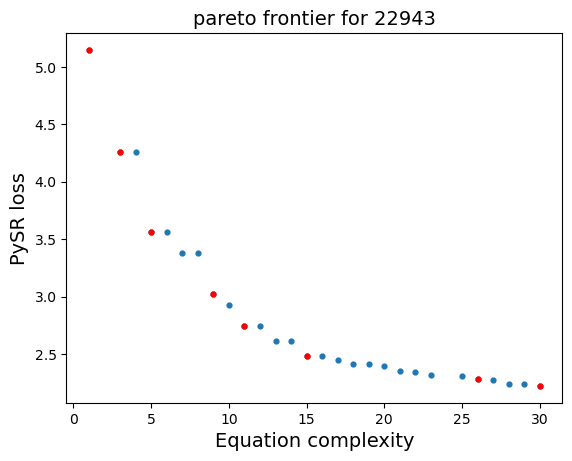

In [12]:
# plot the pareto curve for results
x = results['complexity']
y = results['loss']
# plot the pareto frontier
plt.scatter(x, y, s=12)
plt.xlabel('Equation complexity', fontsize=14)
plt.ylabel('PySR loss', fontsize=14)
plt.title(f'pareto frontier for {version}', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
# plt.ylim(0, max(y)+1)
# plt.title(f'pareto frontier for {version}')
# for each important complexity and loss, plot a red square
plt.scatter(important_complexities, important_losses, color='red', s=12)
plt.savefig(f'pareto_{version}.png')
plt.show()

In [13]:
labels = ['time', 'e+_near', 'e-_near', 'max_strength_mmr_near', 'e+_far', 'e-_far', 'max_strength_mmr_far', 'megno', 'a1', 'e1', 'i1', 'cos_Omega1', 'sin_Omega1', 'cos_pomega1', 'sin_pomega1', 'cos_theta1', 'sin_theta1', 'a2', 'e2', 'i2', 'cos_Omega2', 'sin_Omega2', 'cos_pomega2', 'sin_pomega2', 'cos_theta2', 'sin_theta2', 'a3', 'e3', 'i3', 'cos_Omega3', 'sin_Omega3', 'cos_pomega3', 'sin_pomega3', 'cos_theta3', 'sin_theta3', 'm1', 'm2', 'm3', 'nan_mmr_near', 'nan_mmr_far', 'nan_megno']

# not all of these labels are actually used. for training, these inputs are zeroed out, but still passed in as zeroes.
# ideally, the linear layer ignores them, which does happen if i do l1 regularization to it
skipped = ['nan_mmr_near', 'nan_mmr_far', 'nan_megno', 'e+_near', 'e-_near', 'max_strength_mmr_near', 'e+_far', 'e-_far', 'max_strength_mmr_far', 'megno']

print(len(labels) - len(skipped))

31


In [14]:
# dont print columns 'sympy_format' and 'lambda_format'
results.drop(columns=['sympy_format', 'lambda_format'])

,complexity,loss,score,equation
0,1,5.147663,0.000000,6.943598
1,3,4.255527,0.095162,s17 ^ -0.35427356
2,4,4.255432,0.000022,sin(s17) ^ -0.35427356
3,5,3.567266,0.176397,m26 + (s17 ^ -0.35351956)
4,6,3.566746,0.000146,(s17 ^ -0.35639733) + sin(m26)
5,7,3.384386,0.052481,(s17 ^ -0.35382512) + (m26 - m9)
6,8,3.384301,0.000025,(sin(s17) ^ -0.35382512) + (m26 - m9)
7,9,3.023468,0.112743,m26 + (4.1392016 / ((s17 - s3) ^ 0.056609504))
8,10,2.929280,0.031648,sin(m26) + (4.244596 / ((s17 - s4) ^ 0.0561656...
9,11,2.745916,0.064642,((4.1392016 / ((s17 - s3) ^ 0.056609504)) + m2...


In [15]:
for i in range(len(results)):
    print(i, results['equation'][i])

0 6.943598
1 s17 ^ -0.35427356
2 sin(s17) ^ -0.35427356
3 m26 + (s17 ^ -0.35351956)
4 (s17 ^ -0.35639733) + sin(m26)
5 (s17 ^ -0.35382512) + (m26 - m9)
6 (sin(s17) ^ -0.35382512) + (m26 - m9)
7 m26 + (4.1392016 / ((s17 - s3) ^ 0.056609504))
8 sin(m26) + (4.244596 / ((s17 - s4) ^ 0.056165665))
9 ((4.1392016 / ((s17 - s3) ^ 0.056609504)) + m26) - m9
10 ((4.244596 / ((s17 - sin(s4)) ^ 0.056165665)) + m26) - m9
11 (m26 + (4.3270173 * ((s17 - s38) ^ -0.052691735))) - (m9 / 1.4853791)
12 (4.244596 / ((s17 - sin(s4)) ^ 0.056165665)) + (m26 - (m9 / 1.5668973))
13 (4.1391892 / ((s17 - s4) ^ 0.056165665)) + (m26 - ((m9 + m27) / 2.2296078))
14 (4.0356464 * ((s17 - sin(s4)) ^ -0.05959989)) + (m26 - ((m9 + m27) / 2.1209776))
15 (4.1391892 / ((s17 - s4) ^ 0.056165665)) + (m26 - (((m9 + m27) + m19) / 2.2296078))
16 (4.1391892 / ((s17 - s4) ^ 0.056165665)) + (m26 - (((m9 + m27) + sin(m19)) / 2.1209776))
17 (4.1391892 / ((s17 - sin(s4)) ^ 0.056165665)) + (m26 - (((m9 + m27) + sin(m19)) / 2.1209776))
18

In [16]:
# s = reg.latex_table(precision=2, indices=[[1, 3, 5, 7, 9, 11, 13, 14, 18, 20, 27, 29], [ 1, 3, 5, 7, 9, 11, 13, 14, 18, 20, 27, 29]], columns=['equation', 'complexity', 'loss'])
s = reg.latex_table(precision=2, columns=['equation', 'complexity', 'loss'], indices=[important_indices, important_indices])

# replace m_ with \\mu_ and s_ with \\sigma_
s = s.replace('m_', '\\mu_')
s = s.replace('s_', '\\sigma_')

# remove the first 5 lines which are package imports
s = '\n'.join(s.split('\n')[5:])
print(s)

\begin{table}[h]
\begin{center}
\begin{tabular}{@{}ccc@{}}
\toprule
Equation & Complexity & Loss \\
\midrule
$y_{0} = 6.9$ & $1$ & $5.1$ \\
$y_{0} = \sigma_{17}^{-0.35}$ & $3$ & $4.3$ \\
$y_{0} = \mu_{26} + \sigma_{17}^{-0.35}$ & $5$ & $3.6$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y_{0} = \mu_{26} + \frac{4.1}{\left(\sigma_{17} - \sigma_{3}\right)^{0.057}} \end{dmath*} \end{minipage} & $9$ & $3.0$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y_{0} = \mu_{26} - \mu_{9} + \frac{4.1}{\left(\sigma_{17} - \sigma_{3}\right)^{0.057}} \end{dmath*} \end{minipage} & $11$ & $2.7$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y_{0} = \mu_{26} - 0.45 \mu_{27} - 0.45 \mu_{9} + \frac{4.1}{\left(\sigma_{17} - \sigma_{4}\right)^{0.056}} \end{dmath*} \end{minipage} & $15$ & $2.5$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y_{0} = \mu_{26} - 0.47 \mu_{27} - 0.47 \mu_{9} - \sigma_{8}^{0.45} + \left(\sigma_{17} - \sigma_{4}\r